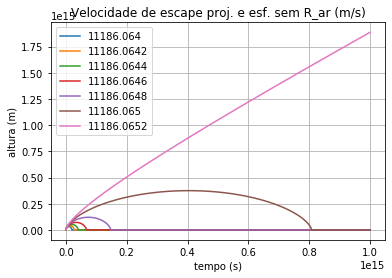

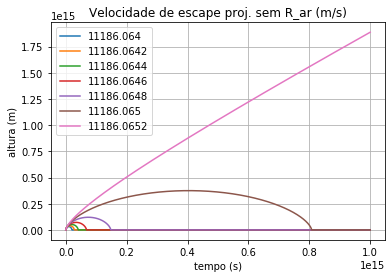

11186.064636549036


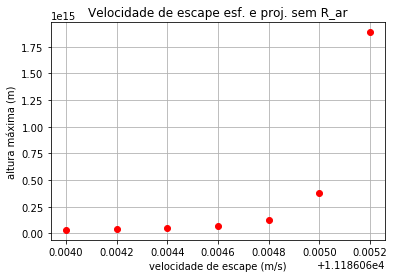

In [19]:
"""
@author: Marco tulio Masselli Rainho Teixeira
"""
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#definicao de parametros 
rho0 = 1.225    # k/m**3
w0 = 7.5e3     # m
R = 6371000    # m 
G =6.67418e-11 # N*m^2/Kg^2 
M = 5.9722e24  # Kg


m_p = 1    #massa em kilogramas 
m_e = 1    #[Kg]
A_p = 4e-4 #Area seccional do projetil em m**2 
A_e = 4e-3 #Area seccional da esfera em m**2 considerando um raio de 11.1 cm (raio aproximado de uma bola de futebol)  
Cd_p = 0.04 
Cd_e = 0.4

V_escape_vacuo = math.sqrt((2*G*M)/R)

def derivadas_sem_R_ar(ListaSolucoes, t,m,A,Cd):
    h = ListaSolucoes[0]
    V = ListaSolucoes[1]
    
    dh_dt = V
    dV_dt = - G*M/((h+R)**2) 
    
    if h<=0 and V < 0:
        dh_dt = 0
        dV_dt = 0
    
    return dh_dt, dV_dt

def derivadas_com_R_ar(ListaSolucoes, t,m,A,Cd):
    h = ListaSolucoes[0]
    V = ListaSolucoes[1]
    
    dh_dt = V
    dV_dt = - G*M/((h+R)**2) -(1/m)*((1/2)*rho0*math.exp(-h/w0)*A*Cd*V**2) 
    
    if h<=0 and V < 0:
        dh_dt = 0
        dV_dt = 0
    
    return dh_dt, dV_dt


#lista pros grafico pre-conclusivos - Sem/R_ar - DISTANCIADO
#listaT1= np.arange(0,1e15,1e10)

#Tanto o grafico do projetil quanto o da esfera usam as msm lista de tempo e velocidades pq como a resistencia do ar n é considerada, a massa, area e Cd nao interferem nos calculos 
#Obs: a diferenca entre o tempo final e intervalo de tempo na lista tempo tem q ser de 10e5 se nao o grafico buga
    
#grafico pre-conclusivo - esfera - Sem/R_ar - AMPLIADO 
listaT1= np.arange(0,1e14,1e10)
lista_V01= [11186.0640, 11186.0642, 11186.0644, 11186.0646, 11186.0648, 11186.0650, 11186.0652]


for i in range(0,len(lista_V01)):
    CI= [0,lista_V01[i]]
    S= odeint(derivadas_sem_R_ar, CI, listaT1,args=(m_e, A_e, Cd_e))
    plt.plot(listaT1, S[:,0], label=lista_V01[i])
plt.title('Velocidade de escape esf. sem R_ar (m/s)')
plt.xlabel("tempo (s)")
plt.ylabel("altura (m)")
plt.legend()
plt.grid(True)
plt.show()

lista_h_max=[]  
#grafico pre conclusico - projetil - Sem/R_ar - AMPLIADO 
for i in range(0,len(lista_V01)):
    CI= [0,lista_V01[i]]
    S= odeint(derivadas_sem_R_ar, CI, listaT1,args=(m_p, A_p, Cd_p))
    lista_h_max.append(max(S[:,0]))
    plt.plot(listaT1, S[:,0], label=lista_V01[i])
plt.title('Velocidade de escape proj. sem R_ar (m/s)')
plt.xlabel("tempo (s)")
plt.ylabel("altura (m)")
plt.legend()
plt.grid(True)
plt.show()

print(V_escape_vacuo) # validacao do modelo


#grafico conclusivo - esfera - projetil - Sem/R_ar
plt.plot(lista_V01, lista_h_max, 'ro')
plt.title('Velocidade de escape esf. e proj. sem R_ar')
plt.xlabel("velocidade de escape (m/s)")
plt.ylabel("altura máxima (m)")
plt.grid(True)
plt.show()



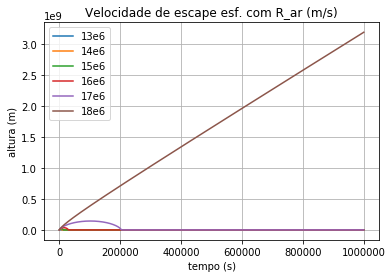

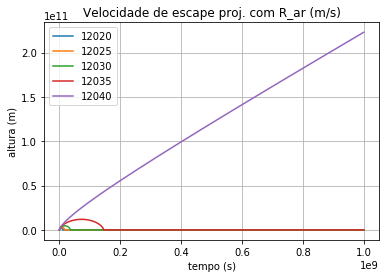

11186.064636549036


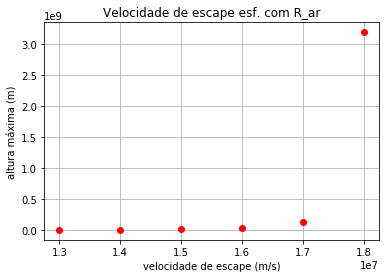

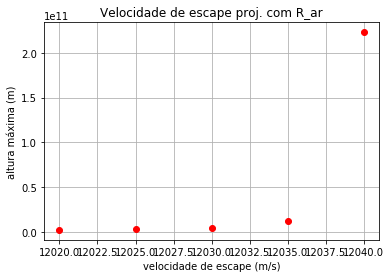

In [31]:
#listas de tempo e velocidade pro grafico pre-conclusico - esfera - Com/R_ar - grafico DISTANCIADO
#listaT2_e= np.arange(0,1e6,1e1)
#lista_V02_e = np.arange(13e6,19e6,1e6)

lista_h_max_e= []
# grafico pre-conclusico  - esfera - Com/R_ar - grafico AMPLIADO
listaT2_e= np.arange(0,1e6,1e1)
lista_V02_e = np.arange(13e6,19e6,1e6)
lista_V02_e_label= ['13e6', '14e6', '15e6', '16e6', '17e6', '18e6']

for i in range(0,len(lista_V02_e)):
    CI= [0,lista_V02_e[i]]
    S= odeint(derivadas_com_R_ar, CI, listaT2_e,args=(m_e, A_e, Cd_e))
    lista_h_max_e.append(max(S[:,0]))
    plt.plot(listaT2_e, S[:,0], label=lista_V02_e_label[i])
plt.title('Velocidade de escape esf. com R_ar (m/s)')
plt.xlabel("tempo (s)")
plt.ylabel("altura (m)")
plt.legend()
plt.grid(True)
plt.show()




# grafico pre-conclusico  - projetil - Com R_ar - grafico AMPLIADO
#listaT2_p= np.arange(0,1e13,1e8)
#lista_V02_p = [12100,13600]
lista_h_max_p= []

listaT2_p= np.arange(0,1e9,1e4)
lista_V02_p = np.arange(12020,12041,5)

for i in range(0,len(lista_V02_p)):
    CI= [0,lista_V02_p[i]]
    S= odeint(derivadas_com_R_ar, CI, listaT2_p,args=(m_p, A_p, Cd_p))
    lista_h_max_p.append(max(S[:,0]))
    plt.plot(listaT2_p, S[:,0], label=lista_V02_p[i])
plt.title('Velocidade de escape proj. com R_ar (m/s)')
plt.xlabel("tempo (s)")
plt.ylabel("altura (m)")
plt.legend()
plt.grid(True)
plt.show()

print(V_escape_vacuo)




#grafico conclusivo - esfera - Com/R_ar
plt.plot(lista_V02_e, lista_h_max_e, 'ro')
plt.title('Velocidade de escape esf. com R_ar')
plt.xlabel("velocidade de escape (m/s)")
plt.ylabel("altura máxima (m)")
plt.grid(True)
plt.show()



#grafico conclusivo - projetil - Com/R_ar
plt.plot(lista_V02_p, lista_h_max_p, 'ro')
plt.title('Velocidade de escape proj. com R_ar')
plt.xlabel("velocidade de escape (m/s)")
plt.ylabel("altura máxima (m)")
plt.grid(True)
plt.show()